<a href="https://colab.research.google.com/github/helymenezes/battery_life/blob/Repositore_vscode/curva_saturacao_bateria_bms_100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **`Análise Exploratória dos dados`**

Problema de negócio, prever a curva de saturação da bateria.






In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [7]:
#carregamento de dados do datalogger
datalog_14300 = pd.read_csv(r'/content/drive/MyDrive/CURSO EAD/PROGRAMACAO/PYTHON/CIENICA DE DADOS/ESTUDO DE CASO/BATTERY_LIFE/202300013713/202300013713-14300.csv', sep = ',')


In [ ]:
datalog_14300.head(10)

,,,,,Days Ago,Min Battery Volt.(V),Max Battery Volt.(V),Max Charge Curr.(A),Max Discharge Curr.(A),Max Charge Power(W),Max Discharge Power(W),Charge Ah,Discharge Ah,Charge KWh,Discharge KWh
30,26,3,29,2,32,64,0,0,900,0,78,0,2,155,0
29,26,3,29,2,31,45,0,0,868,0,61,0,1,667,0
28,26,3,29,2,40,12,0,0,1107,0,72,0,1,956,0
27,26,3,29,2,35,38,0,0,969,0,62,0,1,686,0
26,26,3,29,2,28,4,0,0,765,0,65,0,1,761,0
25,26,2,27,1,14,8,0,0,380,0,48,0,1,287,0
24,26,4,27,1,12,61,0,0,340,0,45,0,1,207,0
23,26,3,29,2,42,25,0,0,1157,0,72,0,1,951,0
22,26,3,29,2,30,95,0,0,875,0,77,0,2,126,0
21,26,3,29,2,28,97,0,0,791,0,84,0,2,331,0


In [ ]:
datalog_coluna = ['Max Battery Volt.(V)','Max Charge Curr.(A)','Max Charge Power(W)','Charge Ah','Discharge KWh']
datalog_14300 = datalog_14300.drop(datalog_coluna,axis=1)



In [ ]:
datalog_14300.shape

(31, 13)

In [ ]:
datalog_14300.nunique() #Nunique() apresenta o numero todad de VALORES UNICOS em cada coluna do dataframe.

Days Ago                  17
Min Battery Volt.(V)      28
Max Battery Volt.(V)       1
Max Charge Curr.(A)        1
Max Discharge Curr.(A)    30
Max Charge Power(W)        1
Max Discharge Power(W)    25
Charge Ah                  1
Discharge Ah               2
Charge KWh                29
Discharge KWh              1
dtype: int64

In [ ]:
datalog_14300.describe()# realização de informações estatítica para comparação média com a mediana.
#datalog_cop120d.info()

,Days Ago,Min Battery Volt.(V),Max Discharge Curr.(A),Max Discharge Power(W),Discharge Ah,Charge KWh
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,29.903226,54.838710,835.612903,73.935484,1.483871,524.064516
std,6.352715,30.702982,175.346073,14.433608,0.508001,297.255102
min,12.000000,2.000000,340.000000,45.000000,1.000000,33.000000
25%,28.000000,31.500000,784.000000,64.000000,1.000000,299.500000
50%,31.000000,61.000000,862.000000,72.000000,1.000000,482.000000
75%,33.500000,75.000000,920.500000,85.000000,2.000000,782.000000
max,42.000000,98.000000,1157.000000,104.000000,2.000000,983.000000


In [ ]:
datalog_14300.isnull().sum() # avaliar valores nulos e soma-lo " indeificar informações nulos para excluir.(Valores missing ou valores ausentes)"

Days Ago                  0
Min Battery Volt.(V)      0
Max Discharge Curr.(A)    0
Max Discharge Power(W)    0
Discharge Ah              0
Charge KWh                0
dtype: int64

In [ ]:
datalog_14300.duplicated().sum # é a soma total de dados duplicados.

<bound method NDFrame._add_numeric_operations.<locals>.sum of 30  26  3  29  2    False
29  26  3  29  2    False
28  26  3  29  2    False
27  26  3  29  2    False
26  26  3  29  2    False
25  26  2  27  1    False
24  26  4  27  1    False
23  26  3  29  2    False
22  26  3  29  2    False
21  26  3  29  2    False
20  26  3  29  2    False
19  26  3  29  2    False
18  26  3  29  2    False
17  26  3  29  2    False
16  26  3  29  1    False
15  26  1  29  2    False
14  26  3  27  5    False
13  26  4  29  1    False
12  26  0  29  2    False
11  26  4  27  3    False
10  26  4  27  3    False
9   26  2  29  2    False
8   26  4  29  2    False
7   26  3  29  2    False
6   26  3  29  2    False
5   26  2  29  1    False
4   26  3  27  3    False
3   26  4  29  2    False
2   26  3  29  2    False
1   26  3  29  2    False
0   28  0  28  6     True
dtype: bool>

In [ ]:
datalog_14300['Charge KWh'].value_counts()# Mostra quais valores são unicos.

803    2
331    2
662    1
434    1
415    1
696    1
33     1
471    1
482    1
516    1
883    1
668    1
835    1
312    1
134    1
155    1
667    1
213    1
983    1
957    1
34     1
126    1
951    1
207    1
287    1
761    1
686    1
956    1
454    1
Name: Charge KWh, dtype: int64

In [ ]:
#Calcular a correlação
datalog_corr = datalog_14300.corr()
datalog_corr

,Days Ago,Min Battery Volt.(V),Max Discharge Curr.(A),Max Discharge Power(W),Discharge Ah,Charge KWh
Days Ago,1.000000,-0.078696,0.997281,0.225684,0.004665,0.349051
Min Battery Volt.(V),-0.078696,1.000000,-0.021212,0.026302,0.024405,-0.021876
Max Discharge Curr.(A),0.997281,-0.021212,1.000000,0.219598,0.004044,0.343895
Max Discharge Power(W),0.225684,0.026302,0.219598,1.000000,0.822699,-0.087402
Discharge Ah,0.004665,0.024405,0.004044,0.822699,1.000000,-0.626680
Charge KWh,0.349051,-0.021876,0.343895,-0.087402,-0.626680,1.000000


<Axes: >

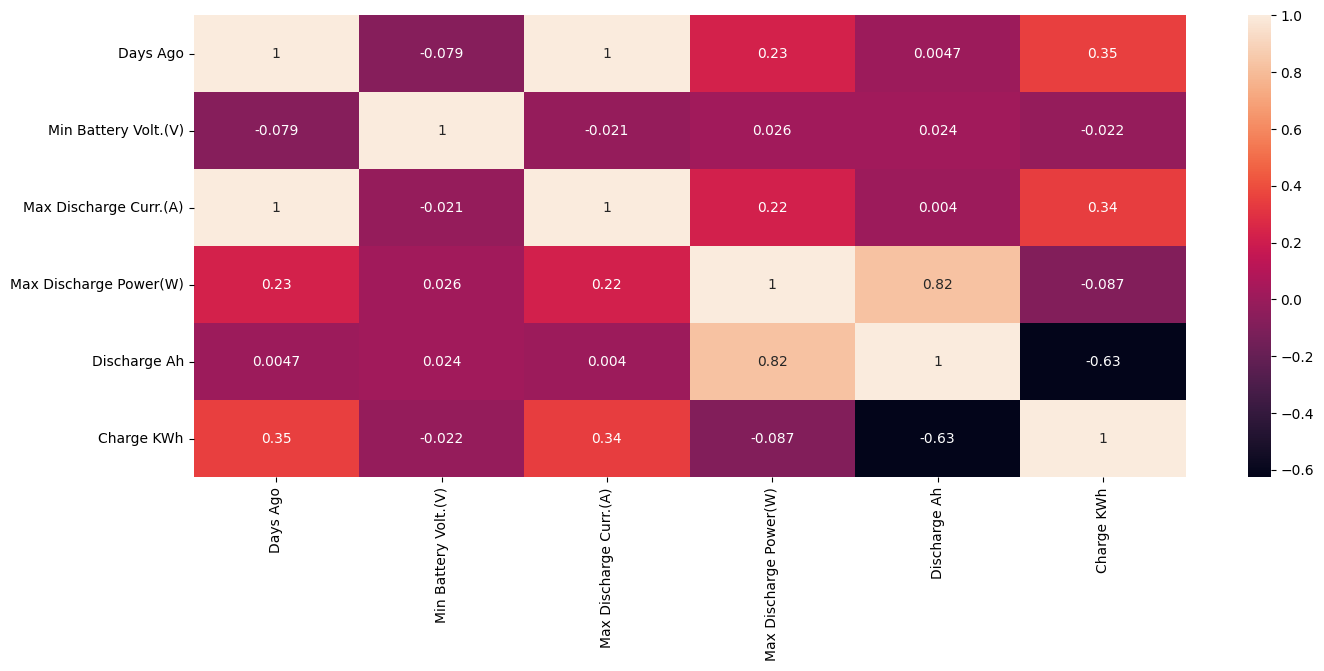

In [ ]:
# Usando o método heatmap do seaborn

plt.figure(figsize=(16,6))
sns.heatmap(data=datalog_corr, annot=True)

In [ ]:
#!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [ ]:
from pandas_profiling import ProfileReport

In [ ]:
profiling = ProfileReport(datalog_14300,title= 'Relatório - Pandas Profiling', html={'style':{'full_width':True}} )

In [ ]:
#profiling
# Traducao das colunas do dataset
#  0   Days Ago / dias atrás
#  1   Min Battery Volt.(V)  /  Volt Mínimo Da Bateria (V)
#  2   Max Discharge Curr.(A) / Corrente de descarga máxima (A)
#  3   Max Discharge Power(W) / Potência máxima de descarga (W)
#  4   Discharge Ah / 4 Descarga Ah
#  5   Charge KWh / Carga KWh

datalog_14300.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 31 entries, (30, 26, 3, 29, 2) to (0, 28, 0, 28, 6)
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Days Ago                31 non-null     int64
 1   Min Battery Volt.(V)    31 non-null     int64
 2   Max Discharge Curr.(A)  31 non-null     int64
 3   Max Discharge Power(W)  31 non-null     int64
 4   Discharge Ah            31 non-null     int64
 5   Charge KWh              31 non-null     int64
dtypes: int64(6)
memory usage: 3.6 KB


In [ ]:
#Importar ploty
import plotly.express as px

In [ ]:
# Correlação entre Quantidade_ciclo x Carg
fig = px.scatter(datalog_14300,x='Max Discharge Power(W)',y='Charge KWh')
fig.show()

In [ ]:
# Correlação entre descarga max(P) x Carga(Kw/h)
fig = px.scatter(datalog_14300,x='Max Discharge Power(W)',y='Charge KWh')
fig.show()

In [ ]:
datalog_14300['Charge KWh'].describe()

count     31.000000
mean     524.064516
std      297.255102
min       33.000000
25%      299.500000
50%      482.000000
75%      782.000000
max      983.000000
Name: Charge KWh, dtype: float64

In [ ]:
import plotly.figure_factory as ff


In [ ]:
labels = ['Distribuição de variável  Max Discarga (Killo_watts)']
fig = ff.create_distplot([datalog_14300['Charge KWh']],labels, bin_size= .2)
fig.show()

In [ ]:
from scipy import stats
stats.skew(datalog_14300['Charge KWh'])

-0.03037922472414669

In [ ]:
#Histograma da variável Charge Kwh
fig = px.histogram(datalog_14300, x= "Max Discharge Curr.(A)", nbins=50, opacity=0.50)
fig.show()

In [ ]:
#Visualizando outliers na Variável Carga
import plotly.express as px

fig = px.box(datalog_14300, y='Charge KWh')
fig.update_layout(width= 800, height= 800)
fig.show()

In [ ]:
datalog_corr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6 entries, Days Ago to Charge KWh
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Days Ago                6 non-null      float64
 1   Min Battery Volt.(V)    6 non-null      float64
 2   Max Discharge Curr.(A)  6 non-null      float64
 3   Max Discharge Power(W)  6 non-null      float64
 4   Discharge Ah            6 non-null      float64
 5   Charge KWh              6 non-null      float64
dtypes: float64(6)
memory usage: 508.0+ bytes


In [ ]:
# estatistica descritivas de outras variáveis
datalog_14300[['Min Battery Volt.(V)','Min Battery Volt.(V)','Max Discharge Curr.(A)','Max Discharge Power(W)','Discharge Ah']].describe()

,Min Battery Volt.(V),Min Battery Volt.(V),Max Discharge Curr.(A),Max Discharge Power(W),Discharge Ah
count,31.000000,31.000000,31.000000,31.000000,31.000000
mean,54.838710,54.838710,835.612903,73.935484,1.483871
std,30.702982,30.702982,175.346073,14.433608,0.508001
min,2.000000,2.000000,340.000000,45.000000,1.000000
25%,31.500000,31.500000,784.000000,64.000000,1.000000
50%,61.000000,61.000000,862.000000,72.000000,1.000000
75%,75.000000,75.000000,920.500000,85.000000,2.000000
max,98.000000,98.000000,1157.000000,104.000000,2.000000


# **Pré_Processamento de dados do dataset da bateria**
Problema de negócio, prever a curva de saturação da bateria

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [13]:
datalog_14300 = pd.read_csv(r'/content/drive/MyDrive/CURSO EAD/PROGRAMACAO/PYTHON/CIENICA DE DADOS/ESTUDO DE CASO/BATTERY_LIFE/202300013713/202300013713-14300.csv', sep = ',')


In [ ]:
# Tratar os valores missing "Eliminá-los" (neste caso não existe valores ausentes conforme informado na análise exploratória de dados, então não é preciso elimina-los)
# datalog_14300.dropna(inplace=True)
# datalog_14300.shape

In [14]:
# Realizando o reset do indice para desanexar as colunas 'level's' e posteriomente excluindo as colunas que não valores.
datalog_14300 = datalog_14300.reset_index()
datalog_14300 = datalog_14300.set_index('level_0')
datalog_14300 = datalog_14300.drop(['level_1','level_2','level_3','level_4','Max Battery Volt.(V)','Max Charge Curr.(A)','Max Charge Power(W)','Charge Ah','Discharge KWh'], axis=1)
datalog_14300.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31 entries, 30 to 0
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Days Ago                31 non-null     int64
 1   Min Battery Volt.(V)    31 non-null     int64
 2   Max Discharge Curr.(A)  31 non-null     int64
 3   Max Discharge Power(W)  31 non-null     int64
 4   Discharge Ah            31 non-null     int64
 5   Charge KWh              31 non-null     int64
dtypes: int64(6)
memory usage: 1.7 KB


In [16]:
datalog_14300.astype('float') # Convertendo para valores int64 para float


,Days Ago,Min Battery Volt.(V),Max Discharge Curr.(A),Max Discharge Power(W),Discharge Ah,Charge KWh
level_0,,,,,,
30,32.0,64.0,900.0,78.0,2.0,155.0
29,31.0,45.0,868.0,61.0,1.0,667.0
28,40.0,12.0,1107.0,72.0,1.0,956.0
27,35.0,38.0,969.0,62.0,1.0,686.0
26,28.0,4.0,765.0,65.0,1.0,761.0
25,14.0,8.0,380.0,48.0,1.0,287.0
24,12.0,61.0,340.0,45.0,1.0,207.0
23,42.0,25.0,1157.0,72.0,1.0,951.0
22,30.0,95.0,875.0,77.0,2.0,126.0


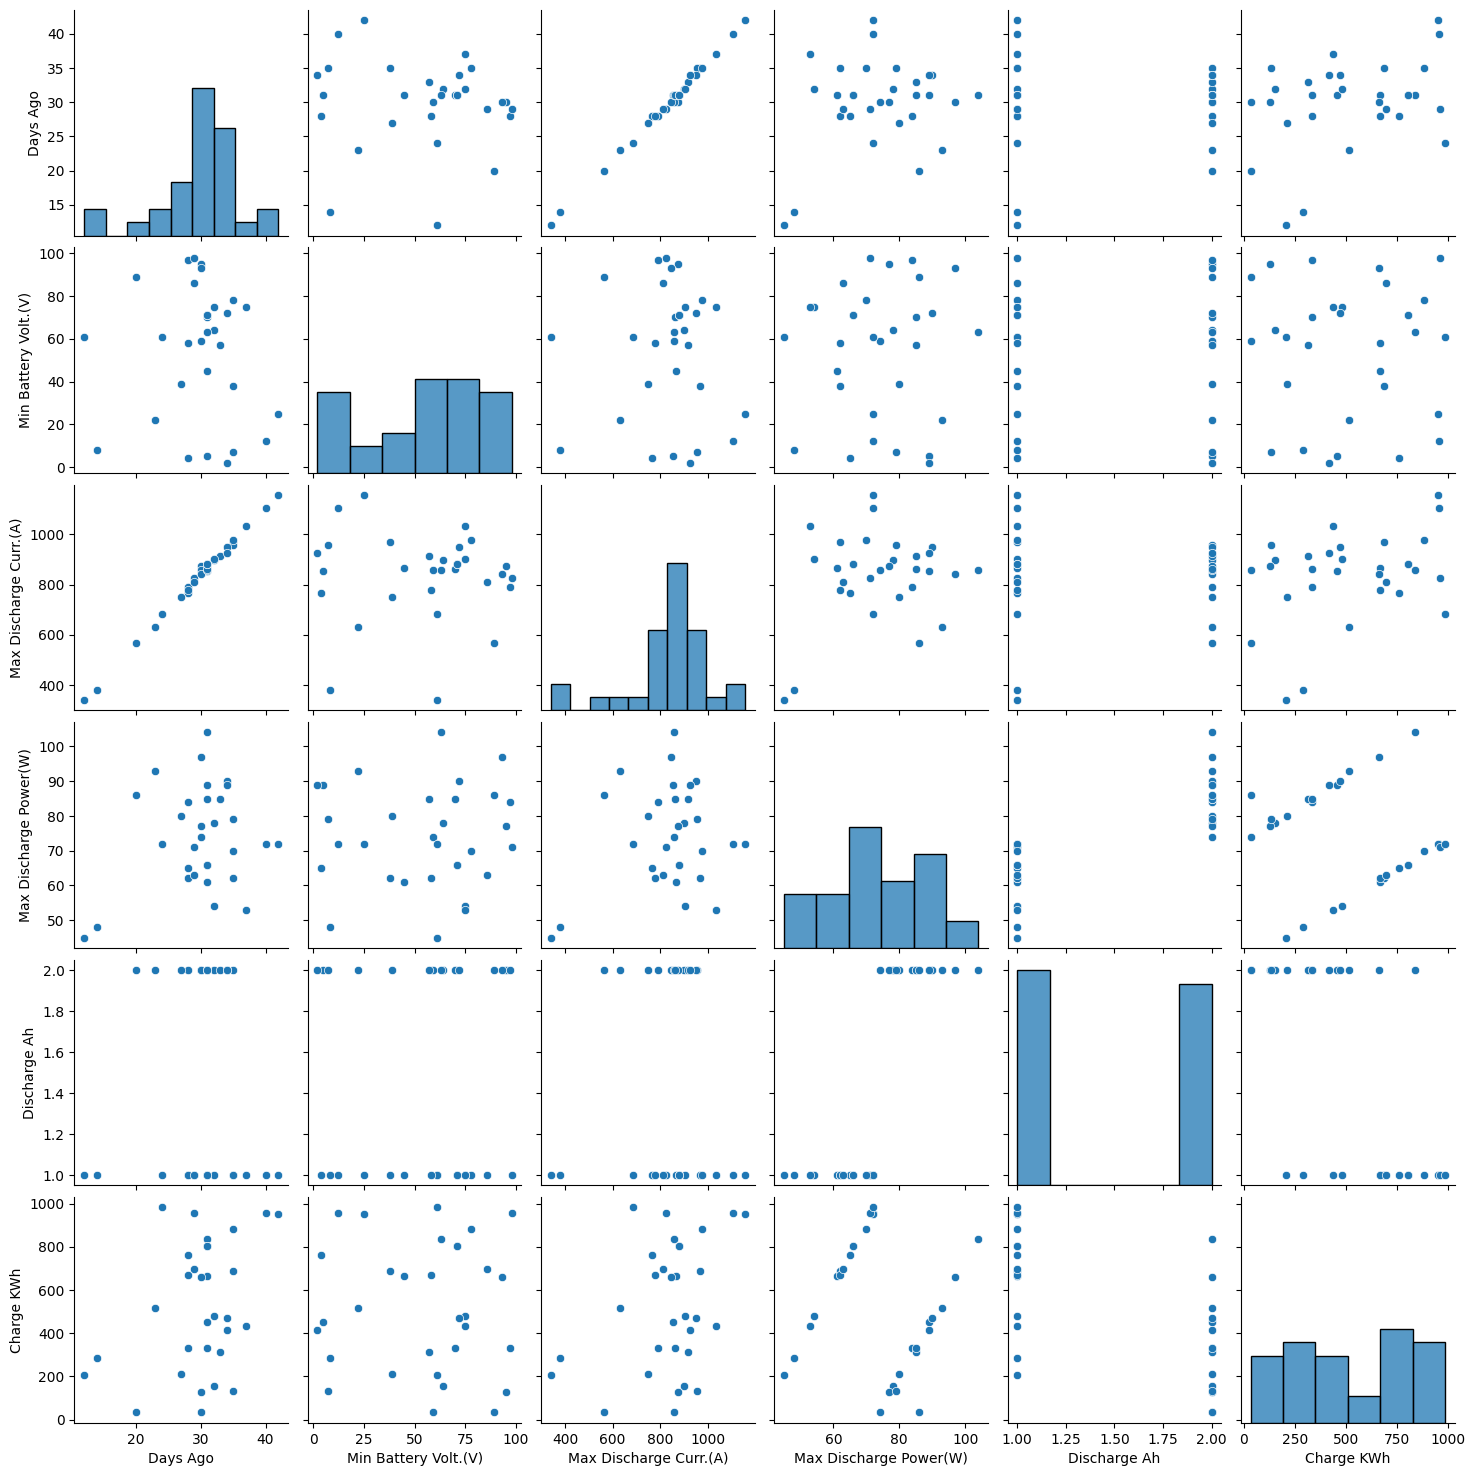

In [ ]:
sns.pairplot(datalog_14300)

In [23]:
#Realizar a separação dos dados dataset entre 80% treino e e 20% para validação.

X = datalog_14300['Max Discharge Power(W)'].values.reshape(-1, 1)
y = datalog_14300['Charge KWh'].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

# **Criação da Máquina preditiva**

In [24]:
#BConstruir o  modelo criado
modelo = LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression()

In [25]:
#Aplicar o modelo para teste
y_predict = modelo.predict(X_test)
y_predict

array([[507.29361048],
       [328.79371123],
       [568.65295085],
       [440.35614826],
       [512.87173233],
       [641.16853492],
       [613.27792566]])

## **Avaliando o desempenho da máquina preditiva **

In [26]:
#Comparar o valor Real do valor predito
real_x_predict = pd.DataFrame({'Real':y_test.flatten(),'Predict':y_predict.flatten()})
real_x_predict.sample(5)

,Real,Predict
4,957,512.871732
0,956,507.293610
1,835,328.793711
5,287,641.168535
3,331,440.356148


In [28]:
# Evolução do modelo - Avaliação da Acurácia do Modelo
print('Acurácia: %.2f' % (modelo.score(X_test, y_test)*100), '%')

Acurácia: -66.28 %
